## Imports

In [1]:
import numpy as np 
import pandas as pd

'''
import torch
from torch.utils.tensorboard import SummaryWriter
'''
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(42)

In [2]:
cust_df = pd.read_csv("./Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
cust_df.drop('Address', axis=1, inplace=True)
# cust_df.drop('Customer Id', axis=1, inplace=True)

cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
X = cust_df.values[:,1:]
X = np.nan_to_num(X)
# X = StandardScaler().fit_transform(cust_data)

Here, `wcss` stands for Within-Cluster-Sum-of-Squares and `X` is your dataset.

The elbow method is used to determine the optimal number of clusters in a dataset. It works by plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

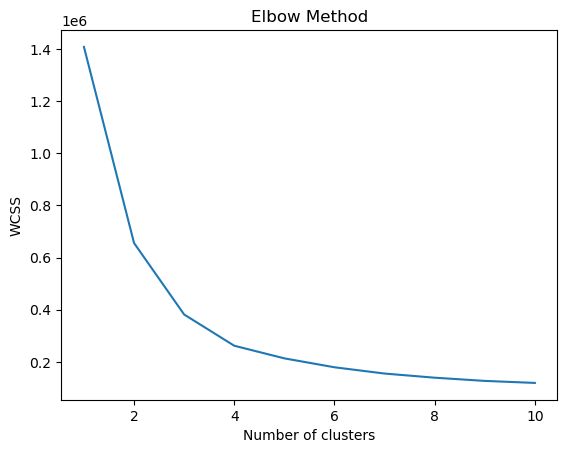

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
num_clusters = 4
k_means = KMeans(init = "k-means++", n_clusters = num_clusters, n_init = 15)
k_means.fit(X)
labels = k_means.labels_
labels_str = [f"{labels[idx]}: {cust_df.iloc[idx].values}" for idx in range(len(labels))]

In [7]:
cust_df["Cust_Cluster"] = labels
cust_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cust_Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [8]:
cust_df.groupby('Cust_Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cust_Cluster,,,,,,,,,
0,433.456172,32.050089,1.611807,5.445438,28.048301,0.930440,1.896669,0.296774,10.122898
1,453.500000,46.600000,2.300000,21.200000,270.900000,7.884000,13.375200,0.428571,8.210000
2,399.150000,43.416667,2.183333,19.483333,123.400000,3.836667,7.340467,0.108696,9.036667
3,411.262443,39.764706,1.805430,12.923077,62.814480,2.312855,4.445878,0.203297,10.691855


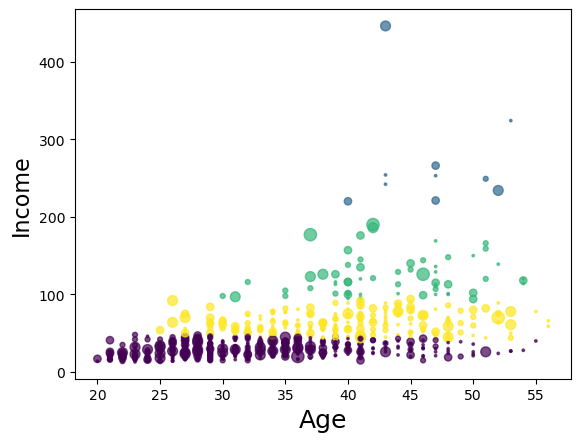

In [12]:
area = np.pi * (X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float64), alpha=0.7)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

In [10]:
'''
# Create a SummaryWriter object that will write data to a log directory
writer = SummaryWriter(log_dir="kmeans")

# Write the high-dimensional data as embeddings to TensorBoard using the writer object
writer.add_embedding(torch.from_numpy(X), metadata=labels_str, tag="data")

# Close the writer object
writer.close()
'''

'\n# Create a SummaryWriter object that will write data to a log directory\nwriter = SummaryWriter(log_dir="kmeans")\n\n# Write the high-dimensional data as embeddings to TensorBoard using the writer object\nwriter.add_embedding(torch.from_numpy(X), metadata=labels_str, tag="data")\n\n# Close the writer object\nwriter.close()\n'